# breast_feature_selection_by_XGB_importance_scores
DC

#### This notebook:
* Load the EWAS aging data selecting for breast data
* Split data train/test 75/25
* Impute with mean of each train column
* Run XGboost 50 time on working data (took 4hrs)
* Rank cpgs by frequency in top 100 importance scores
* Save rankings as pickled 'cpgs_XGboost_breast_ranked'

#### Imports

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')
import os

#### Import our modules

In [2]:
import age_predict.Loading_EWAS_Aging_Data as le
import age_predict.Regression as rg
import age_predict.Pickle_unpickle as pu

In [3]:
import os
# Get
os.getcwd()
#os.chdir('/Users/dcox/Dropbox')

'/Users/dcox/Desktop/EWAS-organized/breast/feature_selection'

In [4]:
# Paths
path_to_data = '../../data/age_methylation_v1/'
path_to_save_cpgs = '../saved_features/'

#### set tissue of interest

In [5]:
tissue_of_interest = 'breast'

#### Load data

In [6]:
%%time
file_in = path_to_data + 'age_methylation_v1.txt'
file_out = path_to_data + tissue_of_interest + '_age_methylation_v1.txt'

df_t = le.load_EWAS_aging_by_tissue(file_in, file_out, search_term=tissue_of_interest,
                          num_rows='all', verbose=True)

finished line 10000
finished line 20000
finished line 30000
finished line 40000
finished line 50000
finished line 60000
finished line 70000
finished line 80000
finished line 90000
finished line 100000
finished line 110000
finished line 120000
finished line 130000
finished line 140000
finished line 150000
finished line 160000
finished line 170000
finished line 180000
finished line 190000
finished line 200000
finished line 210000
finished line 220000
finished line 230000
finished line 240000
finished line 250000
finished line 260000
finished line 270000
finished line 280000
finished line 290000
finished line 300000
finished line 310000
finished line 320000
finished line 330000
finished line 340000
finished line 350000
finished line 360000
finished line 370000
finished line 380000
finished line 390000
finished line 400000
finished line 410000
finished line 420000
finished line 430000
finished line 440000
finished line 450000
finished line 460000
finished line 470000
finished line 480000



#### Select age 20 and older

In [7]:
df_t_over20 = df_t[df_t.age >=20]

#### Split and impute data

In [8]:
%%time
df_p_working, df_p_saved = le.splitting_and_imputing(df_t_over20, input_percent=10, 
                                           fraction_test=0.25, seed=2021)

CPU times: user 2min, sys: 4.89 s, total: 2min 5s
Wall time: 2min 6s


In [9]:
df_p_working

sample_id,tissue,age,cg04023335,cg05213048,cg15295597,cg26520468,cg27539833,cg00008945,cg00011200,cg00011891,cg00014152,cg00016522,cg00016934,cg00018261,cg00021786,cg00026186,cg00072288,cg00072839,cg00074638,cg00112256,cg00114625,cg00114913,cg00116709,cg00139317,cg00140085,cg00142683,cg00192980,cg00200463,cg00206414,cg00240113,cg00241296,cg00241907,cg00243584,cg00264378,cg00265812,cg00266918,cg00360365,cg00373606,cg00374088,cg00378950,cg00380985,cg00381376,cg00388637,cg00391044,cg00399450,cg00408231,cg00412010,cg00412368,cg00416689,cg00423014,...,cg27528247,cg27532722,cg27532867,cg27534599,cg27545494,cg27552198,cg27553637,cg27575890,cg27585287,cg27592453,cg27598806,cg27601574,cg27611781,cg27612019,cg27614432,cg27634071,cg27648216,cg27656573,cg27657363,cg27657537,cg27660038,cg27662611,cg27665648,ch.22.16108507R,ch.22.16454022F,ch.22.17803970R,ch.22.107403R,ch.22.137888R,ch.22.22597277R,ch.22.217069R,ch.22.22928834R,ch.22.23746271F,ch.22.25752197R,ch.22.26167205F,ch.22.26442001R,ch.22.30020508R,ch.22.427671F,ch.22.467397R,ch.22.31817810F,ch.22.33863861F,ch.22.533187F,ch.22.569473R,ch.22.38010425R,ch.22.707968R,ch.22.740407F,ch.22.43177094F,ch.22.46830341F,ch.22.1008279F,ch.22.47579720R,ch.22.48274842R
TCGA-BH-A1FG-11B-12D-A13T-05,breast,88,0.217,0.645,0.029,0.970,0.891,0.332,0.470,0.463,0.931,0.391,0.081,0.435,0.955,0.451,0.378,0.039,0.661,0.552,0.547,0.487,0.514,0.496,0.404,0.496,0.456,0.498,0.208,0.423,0.226,0.365,0.452,0.396,0.502,0.056,0.141,0.418,0.392,0.802,0.466,0.009,0.887,0.344,0.470,0.616,0.367,0.581,0.239,0.744,...,0.927,0.509,0.034,0.181,0.038,0.946,0.026,0.188,0.142,0.91100,0.937,0.575,0.071000,0.632,0.024,0.072,0.202,0.958,0.933,0.079,0.050,0.039,0.814,0.022000,0.026,0.135,0.018,0.133,0.034,0.082000,0.113000,0.019000,0.122,0.042,0.042,0.046000,0.030,0.024,0.012,0.049,0.034,0.126000,0.037,0.010,0.026,0.019,0.012,0.011000,0.059,0.037000
GSM1658467,breast,76,0.080,0.414,0.011,0.982,0.776,0.107,0.430,0.416,0.983,0.341,0.046,0.302,0.975,0.394,0.017,0.067,0.517,0.540,0.255,0.344,0.311,0.257,0.334,0.292,0.311,0.526,0.149,0.493,0.036,0.277,0.493,0.312,0.459,0.053,0.094,0.304,0.274,0.589,0.277,0.003,0.583,0.189,0.394,0.350,0.243,0.486,0.248,0.671,...,0.935,0.716,0.024,0.068,0.002,0.989,0.025,0.186,0.189,0.77900,0.853,0.623,0.056352,0.626,0.059,0.014,0.286,0.990,0.815,0.185,0.073,0.036,0.905,0.011572,0.002,0.143,0.004,0.102,0.009,0.071164,0.132751,0.016192,0.035,0.016,0.007,0.050294,0.014,0.029,0.001,0.044,0.011,0.118000,0.021,0.012,0.059,0.001,0.008,0.000000,0.029,0.006000
GSM2719528,breast,76,0.180,0.800,0.017,0.978,0.806,0.295,0.470,0.543,0.960,0.502,0.053,0.533,0.942,0.495,0.376,0.051,0.658,0.586,0.525,0.436,0.540,0.448,0.429,0.493,0.553,0.450,0.067,0.430,0.157,0.274,0.431,0.430,0.491,0.062,0.132,0.409,0.339,0.856,0.475,0.013,0.861,0.336,0.495,0.593,0.415,0.532,0.152,0.807,...,0.931,0.677,0.019,0.263,0.015,0.950,0.019,0.224,0.236,0.81900,0.959,0.568,0.055000,0.664,0.024,0.028,0.384,0.945,0.922,0.045,0.067,0.007,0.846,0.005000,0.006,0.170,0.006,0.146,0.022,0.032000,0.067000,0.011000,0.063,0.009,0.011,0.028000,0.014,0.010,0.018,0.051,0.016,0.138000,0.023,0.003,0.023,0.004,0.010,0.004000,0.040,0.119000
GSM1658512,breast,81,0.119,0.676,0.013,0.996,0.916,0.373,0.475,0.489,0.967,0.410,0.035,0.479,0.976,0.480,0.385,0.037,0.611,0.465,0.488,0.398,0.502,0.435,0.411,0.477,0.531,0.502,0.128,0.463,0.187,0.264,0.432,0.362,0.512,0.075,0.123,0.357,0.402,0.915,0.503,0.005,0.793,0.358,0.526,0.629,0.356,0.522,0.280,0.812,...,0.958,0.777,0.013,0.168,0.019,0.970,0.028,0.221,0.219,0.84807,0.957,0.650,0.048000,0.732,0.017,0.020,0.288,0.962,0.956,0.030,0.095,0.324,0.885,0.004000,0.003,0.150,0.018,0.112,0.099,0.032000,0.081000,0.005000,0.107,0.085,0.006,0.131000,0.005,0.006,0.004,0.041,0.013,0.107000,0.040,0.008,0.018,0.014,0.014,0.000000,0.060,0.011000
TCGA-BH-A204-11A-53D-A161-05,breast,81,0.192,0.733,0.018,0.944,0.750,0.338,0.376,0.432,0.963,0.426,0.050,0.464,0.958,0.464,0.433,0.046,0.586,0.432,0.497,0.508,0.507,0.351,0.351,0.304,0.435,0.454,

In [10]:
df_p_saved

sample_id,tissue,age,cg00050873,cg00212031,cg00213748,cg00214611,cg00455876,cg01707559,cg02004872,cg02011394,cg02050847,cg02233190,cg02494853,cg02839557,cg02842889,cg03052502,cg03155755,cg03244189,cg03443143,cg03683899,cg03695421,cg03706273,cg03750315,cg03767353,cg04016144,cg04023335,cg04042030,cg04303809,cg04448376,cg04462340,cg04689676,cg04792227,cg04840163,cg04964672,cg05213048,cg05230942,cg05480730,cg05544622,cg05621349,cg05865243,cg05890011,cg06322277,cg06479204,cg07731488,cg07747963,cg07939587,cg08242338,cg08265308,cg08921682,cg09350919,...,ch.22.11243R,ch.22.16108507R,ch.22.16454022F,ch.22.40657F,ch.22.78028F,ch.22.17803970R,ch.22.107403R,ch.22.137888R,ch.22.138449R,ch.22.147839R,ch.22.149158R,ch.22.163059F,ch.22.22597277R,ch.22.217069R,ch.22.22928834R,ch.22.243204R,ch.22.23746271F,ch.22.25752197R,ch.22.26167205F,ch.22.317144R,ch.22.26442001R,ch.22.363412F,ch.22.28920330F,ch.22.30020508R,ch.22.427671F,ch.22.436090R,ch.22.439136F,ch.22.441164F,ch.22.467397R,ch.22.31817810F,ch.22.33863861F,ch.22.528917R,ch.22.533187F,ch.22.569473R,ch.22.38010425R,ch.22.694298R,ch.22.707049R,ch.22.707968R,ch.22.728807R,ch.22.734399R,ch.22.740407F,ch.22.757911F,ch.22.772318F,ch.22.43177094F,ch.22.44116734F,ch.22.909671F,ch.22.46830341F,ch.22.1008279F,ch.22.47579720R,ch.22.48274842R
GSM2719547,breast,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064,NaN,NaN,NaN,0.240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.769,0.736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.007,0.001000,0.013,0.012,0.014,0.172,0.014,0.152,0.014,0.018,NaN,0.010,0.029,0.048000,0.137000,NaN,0.020000,0.147,0.027,0.041,0.037,0.015,0.137,0.028000,0.017,NaN,0.000,0.020,0.016,0.013,0.045,0.087,0.035,0.131,0.026,0.076,0.000,0.006,NaN,0.115,0.023,0.056,0.004,0.013,0.010,0.168,0.011,0.001,0.044,0.004
GSM2719533,breast,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015,NaN,NaN,NaN,0.231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.820,0.800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.024,0.001000,0.006,0.034,0.007,0.167,0.015,0.166,NaN,NaN,NaN,0.026,0.017,0.090000,0.139000,NaN,0.011000,0.146,0.035,0.063,0.020,0.016,0.195,0.127000,0.014,NaN,0.001,0.011,0.013,0.010,0.045,0.196,0.027,0.169,0.029,0.067,0.007,0.012,NaN,NaN,0.018,0.008,0.008,0.020,0.023,0.126,0.019,0.001,0.052,0.008
TCGA-E9-A1ND-11A-43D-A145-05,breast,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.079,NaN,NaN,NaN,0.142,NaN,NaN,NaN,0.944,NaN,0.154,NaN,0.703,0.583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,0.006000,0.022,0.025,0.026,0.121,0.027,0.149,0.000,0.009,0.039,0.083,0.035,0.051000,0.106000,0.018,0.037000,0.097,0.021,0.028,0.037,NaN,0.098,0.041000,0.030,NaN,0.008,0.000,0.024,0.008,0.054,0.128,0.025,0.119,0.033,0.060,0.009,0.013,0.095,NaN,0.025,0.017,0.014,0.020,0.013,0.061,0.015,0.002,0.050,0.084
GSM2892591,breast,65,NaN,NaN,NaN,NaN,NaN,NaN,0.098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.127,NaN,NaN,NaN,0.866,0.052,NaN,NaN,0.792,0.889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.026,0.005000,0.007,0.025,0.006,0.229,0.014,0.226,0.018,0.020,0.027,0.060,0.027,0.038000,0.184000,0.074,0.020000,0.222,0.024,0.049,0.039,0.017,0.186,0.029000,0.024,0.041,0.005,0.011,0.016,0.007,0.078,0.106,0.020,0.174,0.016,0.050,0.007,0.006,0.071,0.057,0.012,0.015,0.013,0.012,0.009,0.056,0.022,0.006,0.079,0.006
GSM2892578,breast,84,NaN,NaN,NaN,NaN,NaN,NaN,0.128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.096,NaN,NaN,NaN,0.922,0.027,NaN,NaN,0.640,0.646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.023,0.007000,0.005,0.021,0.009,0.239,0.018,0.229,0.040,0.031,0.032,0.034,0.048,0.059000,0.197000,0.064,0.014000,0.242,0.035,0.025,0.030,0.017,0.135,0.043000,0.025,0.038,0.007,0.018,0.009,0.011,0.068,0.177,0.028,0.177,0.017,0.041,0.007,0.005,0.111,0.092,0.020,0.017,0.009,0.019,0.020,0.082,0.009,0.003,0.040,0.005
.

#### Running XGboost 50 times to identify top 100 cpgs

In [11]:
%%time
# Runnin XGboost on working dataset 50 times with 50 different train/test splits
# This can take hours 
df_imp, rms_train, rms_test, r2_train, r2_test = rg.repeat_XGBoost(df_p_working, 50, test_size=0.20)

1 r^2 validation = 0.808367674948005
2 r^2 validation = 0.7573590306118108
3 r^2 validation = 0.8203765078388615
4 r^2 validation = 0.839514017328308
5 r^2 validation = 0.8046476311452831
6 r^2 validation = 0.8092439993607758
7 r^2 validation = 0.786507432354047
8 r^2 validation = 0.8468597502600022
9 r^2 validation = 0.8333891865312183
10 r^2 validation = 0.7889493530960697
11 r^2 validation = 0.8270357880958785
12 r^2 validation = 0.8024261270026646
13 r^2 validation = 0.7978745009531447
14 r^2 validation = 0.7441827656861402
15 r^2 validation = 0.8626172013200393
16 r^2 validation = 0.8147400547013155
17 r^2 validation = 0.721573560983962
18 r^2 validation = 0.7618574896478321
19 r^2 validation = 0.8007807547087996
20 r^2 validation = 0.7821180309552668
21 r^2 validation = 0.8064386387809689
22 r^2 validation = 0.8370155081342914
23 r^2 validation = 0.8650789719392584
24 r^2 validation = 0.7916611534739435
25 r^2 validation = 0.7965509764689551
26 r^2 validation = 0.8684092897633857

In [12]:
# write 50 trials results to a file, so don't have to rerun the 50 XGboost trials with the whole dataset again
file = 'df_importance_EWAS_age_' + tissue_of_interest + '_50_trials.csv'
df_imp.to_csv(file)
#df_imp = pd.read_csv('./blood/df_importance_EWAS_age_brain_50_trials.csv' , index_col=0)

In [13]:
# Finding cpgs with on average the highest importance scores, see mean columnn in df below
df_imp_sorted = rg.importances_sorted_by_mean(df_imp)

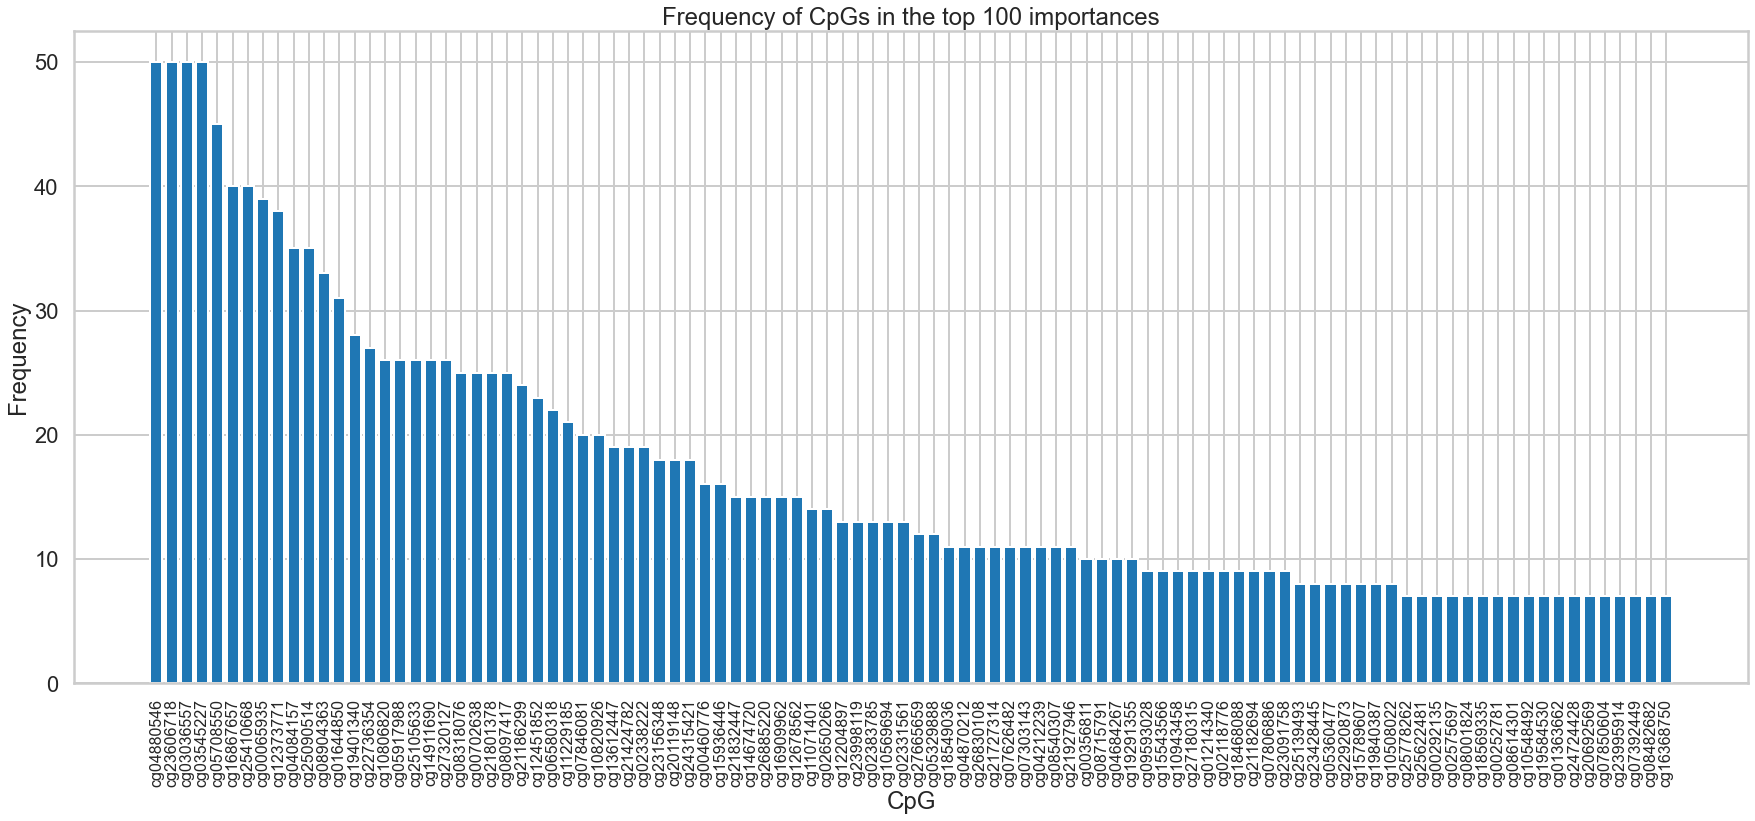

In [14]:
# This function makes a histogram of the frequency of cgs in the top 100 in the 50 trials above
inds, vs, h = rg.histogram_of_top_CpGs_by_importance(df_imp, 100)

In [15]:
cpgs_XGboost_breast_ranked = h.index.values

In [16]:
# Saving Rankings
pu.pickle_object(cpgs_XGboost_breast_ranked, path_to_save_cpgs + 'cpgs_XGboost_breast_ranked')

pickled as ../saved_features/cpgs_XGboost_breast_ranked


In [17]:
#cpgs_XGboost_breast_ranked = pu.get_pickled_object(path_to_save_cpgs + 'cpgs_XGboost_breast_ranked')

#### Save dataframes with columns from just ranked cpgs

In [18]:
df_p_working_breast_ranked = df_p_working[cpgs_XGboost_breast_ranked]
df_p_working_breast_ranked.insert(0, 'age', df_p_working.age)
df_p_working_breast_ranked.insert(0, 'tissue', df_p_working.tissue)

df_p_saved_breast_ranked = df_p_saved[cpgs_XGboost_breast_ranked]
df_p_saved_breast_ranked.insert(0, 'age', df_p_saved.age)
df_p_saved_breast_ranked.insert(0, 'tissue', df_p_saved.tissue)

df_p_saved_breast_ranked.to_csv('df_p_saved_breast_ranked.csv')
df_p_working_breast_ranked.to_csv('df_p_working_breast_ranked.csv')